In [1]:
import pandas as pd

Let's read the excel that contains analyst recommendations over the last 10 years obtained through an API of Yahoo Finance. In this excel we see the company recommended, what type of recommendation it is (buy, sell, hold...), from which bank the recommendation was made and at what date.

To ease things we include a Benchmark to SP500 to compare it easier.

In [2]:
df_rec = pd.read_excel('analyst_recommendations.xlsx', header=1)

In [3]:
df_rec.head()

,Unnamed: 0,S.No,Company Name,Ticker,Benchmark,Rating,Rating Firm,Date,Date after 1 Week,Date after 4 weeks,...,SPY Price on day of recommendation,SPY Price after 1 Week,SPY Price after 4 weeks,SPY Price after 12 weeks,% change 1 week stock price,% change 4 week stock price,% change 12 week stock price,% change 1 week SPY price,% change 4 week SPY price,% change 12 week SPY price
0,NaN,1,3M Company,MMM,SPY,Neutral,Citigroup,2012-07-12,2012-07-19,2012-08-09,...,112.411522,115.964638,118.389496,123.693977,0.051151,0.059946,0.099774,0.031608,0.053179,0.100367
1,NaN,2,3M Company,MMM,SPY,Overweight,Morgan Stanley,2012-07-16,2012-07-23,2012-08-13,...,114.028084,113.741806,118.524223,123.279259,0.014302,0.048808,0.089416,-0.002511,0.039430,0.081131
2,NaN,3,3M Company,MMM,SPY,Neutral,Citigroup,2012-09-05,2012-09-12,2012-10-03,...,118.642151,121.572174,122.813683,119.740990,-0.010245,0.022125,-0.002366,0.024696,0.035161,0.009262
3,NaN,4,3M Company,MMM,SPY,Neutral,JP Morgan,2012-09-10,2012-09-17,2012-10-08,...,120.831238,123.550789,123.279259,119.732506,0.034300,0.051837,0.002523,0.022507,0.020260,-0.009093
4,NaN,5,3M Company,MMM,SPY,Buy,Jefferies,2012-09-24,2012-10-01,2012-10-22,...,123.287697,122.187286,121.391609,121.696358,-0.004695,-0.012803,-0.000887,-0.008926,-0.015379,-0.012908


Recommendation type

In [4]:
df_rec['Rating'].value_counts()

Rating
Buy                     17634
Neutral                 12120
Overweight               8404
Outperform               8017
Hold                     6065
Equal-Weight             4876
Market Perform           2683
Underweight              1432
Underperform             1312
Sell                     1183
Sector Perform            544
Strong Buy                481
In-Line                   269
Positive                  264
Market Outperform         207
Sector Weight             167
Perform                   155
Equal-weight               90
Reduce                     70
Sector Outperform          63
Peer Perform               61
Accumulate                 56
Negative                   32
Long-Term Buy              29
Top Pick                   29
Fair Value                 23
Mixed                      20
Conviction Buy             16
Market Weight              15
Sector Underperform        12
Outperformer                9
Market Underperform         5
Strong Sell                 4
Add

We observe that the ratings are based on human input. So, we change it to only have 4 categories: Buy, Sell, Hold and Other.

In [5]:
rating_mapping = {
    'Buy': 'Buy',
    'Neutral': 'Hold',
    'Overweight': 'Buy',
    'Outperform': 'Buy',
    'Hold': 'Hold',
    'Equal-Weight': 'Hold',
    'Market Perform': 'Hold',
    'Underweight': 'Sell',
    'Underperform': 'Sell',
    'Sell': 'Sell',
    'Sector Perform': 'Hold',
    'Strong Buy': 'Buy',
    'In-Line': 'Hold',
    'Positive': 'Buy',
    'Market Outperform': 'Buy',
    'Sector Weight': 'Hold',
    'Perform': 'Hold',
    'Equal-weight': 'Hold',
    'Reduce': 'Hold',
    'Sector Outperform': 'Buy',
    'Peer Perform': 'Hold',
    'Accumulate': 'Buy',
    'Negative': 'Sell',
    'Long-Term Buy': 'Buy',
    'Top Pick': 'Buy',
    'Fair Value': 'Hold',
    'Mixed': 'Other',
    'Conviction Buy': 'Buy',
    'Market Weight': 'Hold',
    'Sector Underperform': 'Sell',
    'Outperformer': 'Buy',
    'Market Underperform': 'Sell',
    'Strong Sell': 'Sell',
    'Add': 'Buy',
    'Long-term Buy': 'Buy',
    'Cautious': 'Hold',
    'Average': 'Other',
    'Trim': 'Other',
    'Above Average': 'Other',
    'Below Average': 'Other',
    'Underperformer': 'Sell',
    'In-line': 'Hold',
    'Speculative Buy': 'Buy',
    'Peer perform': 'Hold',
    'Hold Neutral': 'Hold',
    'Gradually Accumulate': 'Hold',
}

In [6]:
df_rec['Rating_Category'] = df_rec['Rating'].map(rating_mapping).fillna('Other')

Distribution of Recommendations types

In [7]:
df_rec['Rating_Category'].value_counts()

Rating_Category
Buy      35217
Hold     27146
Sell      3982
Other      171
Name: count, dtype: int64

In [8]:
df_rec.columns

Index(['Unnamed: 0', 'S.No', 'Company Name', 'Ticker', 'Benchmark', 'Rating',
       'Rating Firm', 'Date', 'Date after 1 Week', 'Date after 4 weeks',
       'Date after 12 weeks', 'Stock Price on day of recommendation',
       'Stock Price after 1 Week', 'Stock Price after 4 weeks',
       'Stock Price after 12 weeks', 'SPY Price on day of recommendation',
       'SPY Price after 1 Week', 'SPY Price after 4 weeks',
       'SPY Price after 12 weeks', '% change 1 week stock price',
       '% change 4 week stock price', '% change 12 week stock price',
       '% change 1 week SPY price', '% change 4 week SPY price',
       '% change 12 week SPY price', 'Rating_Category'],
      dtype='object')

Let's see what would be the average return based on 1 week, 1 month and 3 months following the recommendations for buy, sell and hold.

In [9]:
# Filter DataFrame to include only 'Buy' and 'Sell' ratings
filtered_df = df_rec[df_rec['Rating_Category'].isin(['Buy', 'Sell', 'Hold'])]

# Calculate the average win/loss after '% change X week stock price'
average_win_loss_week = filtered_df.groupby('Rating_Category')['% change 1 week stock price'].mean()
average_win_loss_month = filtered_df.groupby('Rating_Category')['% change 4 week stock price'].mean()
average_win_loss_quarter = filtered_df.groupby('Rating_Category')['% change 12 week stock price'].mean()

# Calculate the average win/loss after '% change X week SPY price'
average_win_loss_week_spy = filtered_df.groupby('Rating_Category')['% change 1 week SPY price'].mean()
average_win_loss_month_spy = filtered_df.groupby('Rating_Category')['% change 4 week SPY price'].mean()
average_win_loss_quarter_spy = filtered_df.groupby('Rating_Category')['% change 12 week SPY price'].mean()

# Display the result stock
print(average_win_loss_week)
print(average_win_loss_month)
print(average_win_loss_quarter)

# Display the result SPY
print(average_win_loss_week_spy)
print(average_win_loss_month_spy)
print(average_win_loss_quarter_spy)

# Display difference
print(average_win_loss_week / average_win_loss_week_spy - 1)
print(average_win_loss_month / average_win_loss_month_spy - 1)
print(average_win_loss_quarter / average_win_loss_quarter_spy - 1)

Rating_Category
Buy     0.004586
Hold    0.003810
Sell    0.003255
Name: % change 1 week stock price, dtype: float64
Rating_Category
Buy     0.016791
Hold    0.016366
Sell    0.018027
Name: % change 4 week stock price, dtype: float64
Rating_Category
Buy     0.048592
Hold    0.047569
Sell    0.054366
Name: % change 12 week stock price, dtype: float64
Rating_Category
Buy     0.003259
Hold    0.003159
Sell    0.003473
Name: % change 1 week SPY price, dtype: float64
Rating_Category
Buy     0.013623
Hold    0.013746
Sell    0.015337
Name: % change 4 week SPY price, dtype: float64
Rating_Category
Buy     0.039565
Hold    0.039536
Sell    0.040149
Name: % change 12 week SPY price, dtype: float64
Rating_Category
Buy     0.407235
Hold    0.206204
Sell   -0.062817
dtype: float64
Rating_Category
Buy     0.232574
Hold    0.190587
Sell    0.175343
dtype: float64
Rating_Category
Buy     0.228161
Hold    0.203184
Sell    0.354109
dtype: float64


We come to the following conclusion:

Buy recommendations (average change):

| Time Period | Stock Change in % | SPY Change in % | Stock over SPY Change in % |
|:-------------:|:--------------:|:-------------:|:-------------:|
| One Week          | 0.46%         | 0.33%         | 40.72%         |
| One Month          | 1.68%         | 1.36%         | 23.26%         |
| One Quarter          | 4.86%         | 3.96%         | 22.81%         |

Hold recommendations (average change):

| Time Period | Stock Change in % | SPY Change in % | Stock over SPY Change in % |
|:-------------:|:--------------:|:-------------:|:-------------:|
| One Week          | 0.38%         |  0.32%         | 20.62%         |
| One Month          | 1.64%         | 1.37%         | 19.06%         |
| One Quarter          | 4.76%         | 3.95%         | 20.32%         |

Sell recommendations (average change):

| Time Period | Stock Change in % | SPY Change in % | Stock over SPY Change in % |
|:-------------:|:--------------:|:-------------:|:-------------:|
| One Week          | 0.33%         |  0.35%         |  -6.28%         |
| One Month          | 1.80%         | 1.53%         | 17.53%         |
| One Quarter          | 5.44%         | 4.01%         | 35.41%         |

Take into consideration that the sell recommendations are positive meaning that we would have lost money.

In the following dataframe we can visualize the Firms that created the recommendation, the amount of recommendations and the change in % of stocke and SPY prices. Be aware I only included Buy and Hold recommendations.

In [10]:
# Filter DataFrame to include only 'Buy' and 'Hold' ratings
filtered_df_1 = df_rec[df_rec['Rating_Category'].isin(['Buy', 'Hold'])]


# Group by 'Rating Firm' and calculate the required metrics
grouped_df = filtered_df_1.groupby('Rating Firm').agg({
    'Rating Firm': 'count',
    '% change 1 week stock price': 'mean',
    '% change 1 week SPY price': 'mean',
    '% change 4 week stock price': 'mean',
    '% change 4 week SPY price': 'mean',
    '% change 12 week stock price': 'mean',
    '% change 12 week SPY price': 'mean'
}).rename(columns={'Rating Firm': 'Number of Recommendations'})

grouped_df

,Number of Recommendations,% change 1 week stock price,% change 1 week SPY price,% change 4 week stock price,% change 4 week SPY price,% change 12 week stock price,% change 12 week SPY price
Rating Firm,,,,,,,
ABG Sundal Collier,5,0.057660,0.012201,0.050143,0.010058,0.084453,0.027724
ACI Research,1,-0.000940,0.006744,-0.028652,-0.001115,0.080524,0.008735
Aegis Capital,24,-0.000668,0.003328,0.008824,-0.010255,0.040848,0.030738
Albert Fried,11,0.002092,0.003561,0.026171,0.016086,0.065337,0.033980
Alembic Global,9,-0.014233,-0.008486,-0.044655,-0.028121,-0.010971,-0.005048
...,...,...,...,...,...,...,...
Wolfe Research,126,0.001483,0.003793,0.017506,0.023654,0.000928,0.025232
Wolfe Trahan,1,0.020492,0.023927,-0.055191,0.047183,-0.005191,0.087243
Wunderlich,202,0.000038,0.003409,0.003900,0.012655,0.031706,0.034206


For simplification let's order them based on the amount of recommendations and view the first 15 only and round the % up to 2 decimals.

In [11]:
# Sort the DataFrame based on 'Number of Recommendations' in descending order
grouped_df = grouped_df.sort_values(by='Number of Recommendations', ascending=False)

grouped_df['% change stock over SPY week'] = grouped_df['% change 1 week stock price'] / grouped_df['% change 1 week SPY price'] - 1
grouped_df['% change stock over SPY month'] = grouped_df['% change 4 week stock price'] / grouped_df['% change 4 week SPY price'] - 1
grouped_df['% change stock over SPY quarter'] = grouped_df['% change 12 week stock price'] / grouped_df['% change 12 week SPY price'] - 1

# Multiply the last 4 columns by 100 and add '%' character
percentage_columns = ['% change 1 week stock price', '% change 1 week SPY price',
                       '% change 4 week stock price', '% change 4 week SPY price',
                       '% change 12 week stock price', '% change 12 week SPY price',
                       '% change stock over SPY week', '% change stock over SPY month',
                       '% change stock over SPY quarter']

grouped_df[percentage_columns] = round(grouped_df[percentage_columns] * 100,2)
grouped_df[percentage_columns] = grouped_df[percentage_columns].astype(str) + '%'

#Reorder
grouped_df=grouped_df[['Number of Recommendations', '% change 1 week stock price',
       '% change 1 week SPY price', '% change stock over SPY week', '% change 4 week stock price',
       '% change 4 week SPY price', '% change stock over SPY month', '% change 12 week stock price',
       '% change 12 week SPY price','% change stock over SPY quarter']]
grouped_df.head(15)

,Number of Recommendations,% change 1 week stock price,% change 1 week SPY price,% change stock over SPY week,% change 4 week stock price,% change 4 week SPY price,% change stock over SPY month,% change 12 week stock price,% change 12 week SPY price,% change stock over SPY quarter
Rating Firm,,,,,,,,,,
Morgan Stanley,5192,0.46%,0.39%,17.4%,2.49%,2.13%,16.8%,6.37%,5.36%,18.82%
Citigroup,4261,0.32%,0.3%,4.53%,1.34%,1.2%,11.47%,3.7%,3.33%,11.24%
Deutsche Bank,4152,0.49%,0.36%,37.01%,1.58%,1.41%,11.79%,4.52%,3.92%,15.21%
Barclays,3788,0.28%,0.12%,145.5%,1.65%,1.13%,45.92%,4.36%,3.23%,35.24%
Credit Suisse,3025,0.36%,0.4%,-9.12%,1.89%,1.47%,28.64%,5.02%,4.13%,21.57%
JP Morgan,2904,0.43%,0.3%,42.66%,1.59%,1.35%,17.82%,4.25%,3.77%,12.79%
UBS,2888,0.3%,0.16%,89.89%,1.66%,1.21%,37.34%,5.26%,4.38%,20.2%
Jefferies,2634,0.41%,0.29%,39.98%,1.58%,1.32%,20.11%,4.41%,3.64%,21.12%
Wells Fargo,1728,0.72%,0.62%,16.06%,2.33%,1.93%,20.92%,6.23%,5.14%,21.31%


We observe that in most cases we would have got a win. But this does not mean that the recommendation is the best, this is also due that we have been in a market with an up trend.

The % change for SPY varies based on when the recommendation was done. Some of the best firms are:


| Time Period | Firm | # of Recommendations | % Change in Stock | % Change in SPY | % Stock over SPY |
|:-------------:|:--------------:|:--------------:|:-------------:|:-------------:|:-------------:|
| One Week          | Barclays         | 3788        |  0.28%         |  0.12%         |  145.5%         |
| One Week          | Deutsche Bank         | 4152        |  0.49%         |  0.36%         |  37.0%         |
| One Week          | Nomura         | 1228        |  0.75%         |  0.51%         |  47.7%         |
| One Month          | Barclays         | 3788         | 1.65%         | 1.13%         |  45.9%         |
| One Month          | Morgan Stanley         | 5192         | 2.49%         | 2.13%         |  16.8%         |
| One Month          | Nomura         | 1228        | 1.79%         | 1.27%         |  40.7%         |
| One Quarter          | Goldman Sachs         | 1539         | 5.13%         | 3.68%         |  39.5%         |
| One Quarter          | Morgan Stanley         | 3788         | 6.37%         | 5.36%         |  18.8%         |
| One Quarter          | Barclays         | 3788         | 4.36%         | 3.23%         |  35.2%         |


Let's visualize the gain theoretically obtained if I bought every time a analyst made a recommendation and I kept it for one week, one month or one quarter.

Take into consideration none comissions are applied.

In [12]:
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

In [13]:

filtered_df['Cumulative % Change SPY 1 week'] = filtered_df['% change 1 week SPY price'].cumsum()

BUY OR HOLD

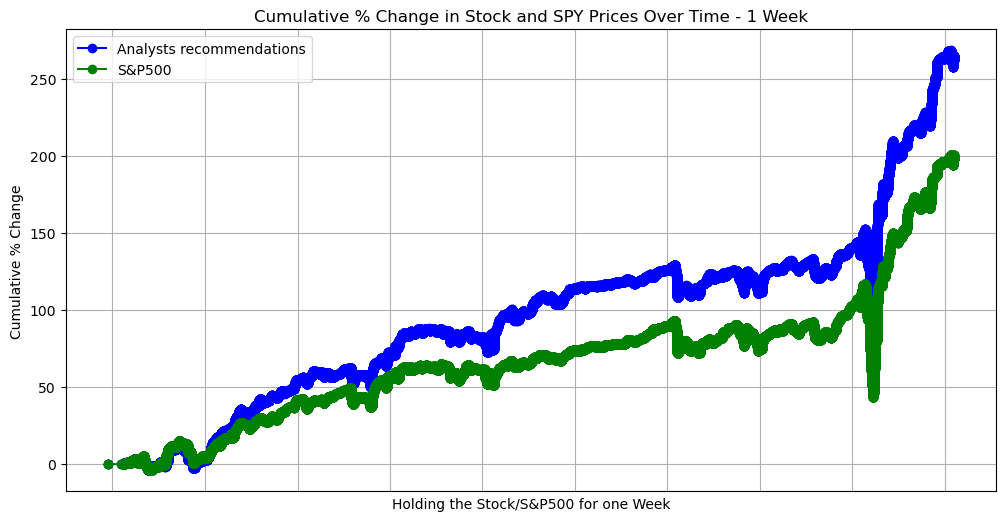

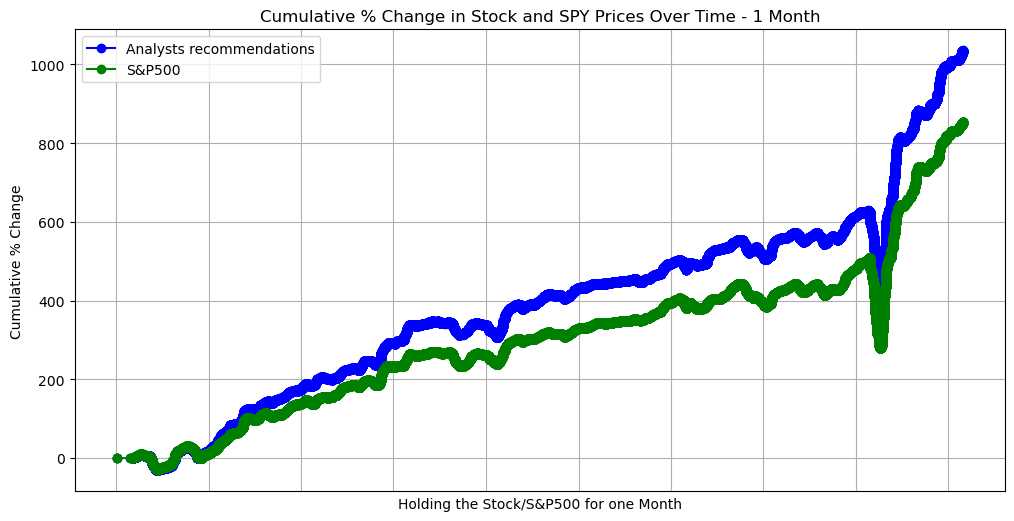

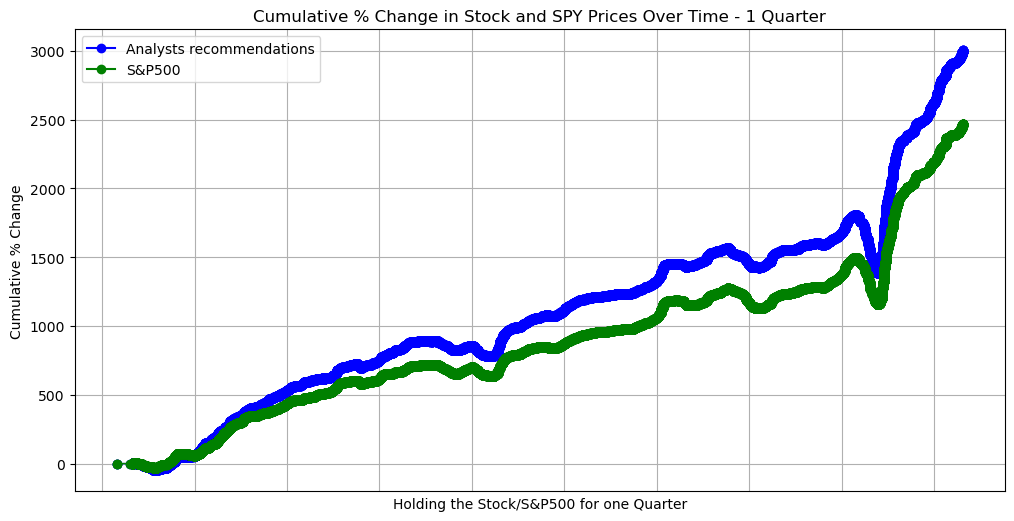

In [142]:
from matplotlib.dates import DateFormatter

# Convert 'Date after 1 Week' to datetime objects
filtered_df_1['Date after 1 Week'] = pd.to_datetime(filtered_df_1['Date after 1 Week'])

# Sort DataFrame by 'Date after 1 Week'
filtered_df = filtered_df_1.sort_values(by='Date after 1 Week')

# Calculate cumulative sum of '% change 1 week stock price' and for SPY
filtered_df['Cumulative % Change Stock 1 week'] = filtered_df['% change 1 week stock price'].cumsum()
filtered_df['Cumulative % Change SPY 1 week'] = filtered_df['% change 1 week SPY price'].cumsum()

# Convert 'Date after 1 Week' to datetime objects
filtered_df_1['Date after 4 Weeks'] = pd.to_datetime(filtered_df_1['Date after 4 weeks'])

# Sort DataFrame by 'Date after 1 Week'
filtered_df = filtered_df.sort_values(by='Date after 4 Weeks')

# Calculate cumulative sum of '% change 1 week stock price' and for SPY
filtered_df['Cumulative % Change Stock 4 weeks'] = filtered_df['% change 4 week stock price'].cumsum()
filtered_df['Cumulative % Change SPY 4 weeks'] = filtered_df['% change 4 week SPY price'].cumsum()

# Convert 'Date after 1 Week' to datetime objects
filtered_df_1['Date after 12 Weeks'] = pd.to_datetime(filtered_df_1['Date after 12 weeks'])

# Sort DataFrame by 'Date after 1 Week'
filtered_df = filtered_df.sort_values(by='Date after 12 Weeks')

# Calculate cumulative sum of '% change 1 week stock price' and for SPY
filtered_df['Cumulative % Change Stock 12 weeks'] = filtered_df['% change 12 week stock price'].cumsum()
filtered_df['Cumulative % Change SPY 12 weeks'] = filtered_df['% change 12 week SPY price'].cumsum()


# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Date after 1 Week'], filtered_df['Cumulative % Change Stock 1 week'], marker='o', linestyle='-', color='b', label='Analysts recommendations')
plt.plot(filtered_df['Date after 1 Week'], filtered_df['Cumulative % Change SPY 1 week'], marker='o', linestyle='-', color='g', label='S&P500')

# Format x-axis as years
date_format = DateFormatter("%Y")
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
plt.gca().xaxis.set_major_formatter(date_format)

# Remove x-axis labels
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Add labels and title
plt.xlabel('Holding the Stock/S&P500 for one Week')
plt.ylabel('Cumulative % Change')
plt.title('Cumulative % Change in Stock and SPY Prices Over Time - 1 Week')
plt.legend()

# Adjust line thickness
plt.setp(plt.gca().get_lines(), linewidth=1)

plt.grid(True)
plt.show()

# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Date after 4 Weeks'], filtered_df['Cumulative % Change Stock 4 weeks'], marker='o', linestyle='-', color='b', label='Analysts recommendations')
plt.plot(filtered_df['Date after 4 Weeks'], filtered_df['Cumulative % Change SPY 4 weeks'], marker='o', linestyle='-', color='g', label='S&P500')

# Format x-axis as years
date_format = DateFormatter("%Y")
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
plt.gca().xaxis.set_major_formatter(date_format)

# Remove x-axis labels
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Add labels and title
plt.xlabel('Holding the Stock/S&P500 for one Month')
plt.ylabel('Cumulative % Change')
plt.title('Cumulative % Change in Stock and SPY Prices Over Time - 1 Month')
plt.legend()

# Adjust line thickness
plt.setp(plt.gca().get_lines(), linewidth=1)

plt.grid(True)
plt.show()


# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Date after 12 Weeks'], filtered_df['Cumulative % Change Stock 12 weeks'], marker='o', linestyle='-', color='b', label='Analysts recommendations')
plt.plot(filtered_df['Date after 12 Weeks'], filtered_df['Cumulative % Change SPY 12 weeks'], marker='o', linestyle='-', color='g', label='S&P500')

# Format x-axis as years
date_format = DateFormatter("%Y")
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
plt.gca().xaxis.set_major_formatter(date_format)

# Remove x-axis labels
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Add labels and title
plt.xlabel('Holding the Stock/S&P500 for one Quarter')
plt.ylabel('Cumulative % Change')
plt.title('Cumulative % Change in Stock and SPY Prices Over Time - 1 Quarter')
plt.legend()

# Adjust line thickness
plt.setp(plt.gca().get_lines(), linewidth=1)

plt.grid(True)
plt.show()

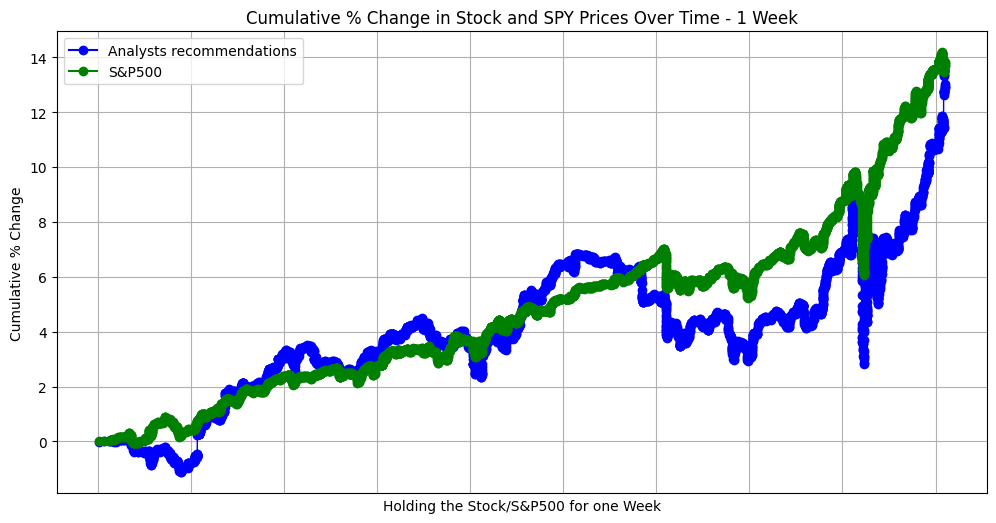

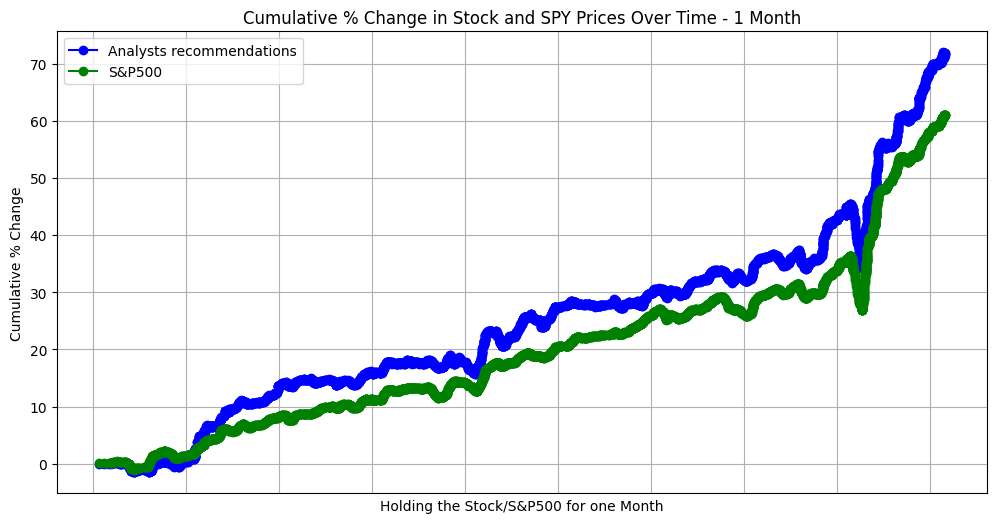

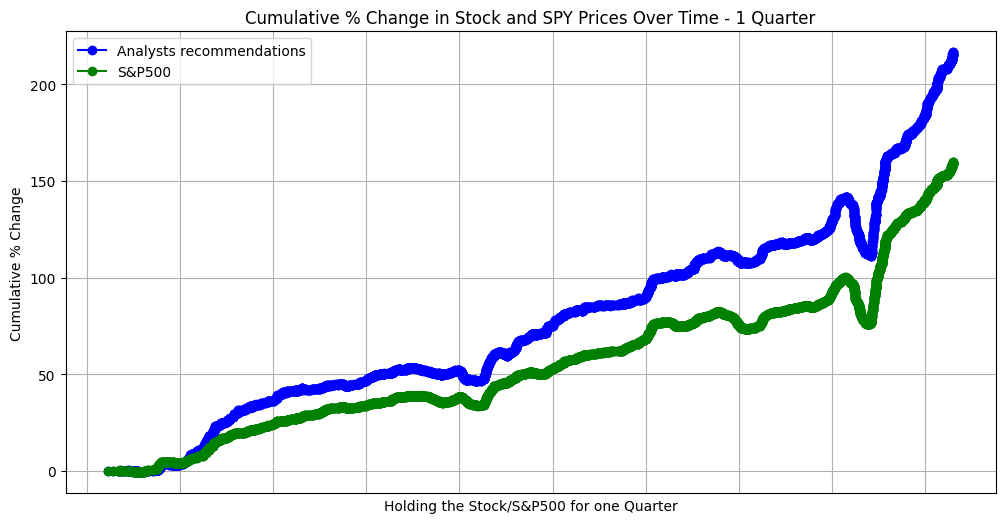

In [28]:
# Filter DataFrame to include only 'Sell'
filtered_df_1 = df_rec[df_rec['Rating_Category'].isin(['Sell'])]

from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt

# Convert 'Date after 1 Week' to datetime objects
filtered_df_1['Date after 1 Week'] = pd.to_datetime(filtered_df_1['Date after 1 Week'])

# Sort DataFrame by 'Date after 1 Week'
filtered_df = filtered_df.sort_values(by='Date after 1 Week')

# Calculate cumulative sum of '% change 1 week stock price' and for SPY
filtered_df['Cumulative % Change Stock 1 week'] = filtered_df['% change 1 week stock price'].cumsum()
filtered_df['Cumulative % Change SPY 1 week'] = filtered_df['% change 1 week SPY price'].cumsum()

# Convert 'Date after 1 Week' to datetime objects
filtered_df_1['Date after 4 Weeks'] = pd.to_datetime(filtered_df_1['Date after 4 weeks'])


# Calculate cumulative sum of '% change 1 week stock price' and for SPY
filtered_df['Cumulative % Change Stock 4 weeks'] = filtered_df['% change 4 week stock price'].cumsum()
filtered_df['Cumulative % Change SPY 4 weeks'] = filtered_df['% change 4 week SPY price'].cumsum()

# Convert 'Date after 1 Week' to datetime objects
filtered_df_1['Date after 12 Weeks'] = pd.to_datetime(filtered_df_1['Date after 12 weeks'])


# Calculate cumulative sum of '% change 1 week stock price' and for SPY
filtered_df['Cumulative % Change Stock 12 weeks'] = filtered_df['% change 12 week stock price'].cumsum()
filtered_df['Cumulative % Change SPY 12 weeks'] = filtered_df['% change 12 week SPY price'].cumsum()


# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Date after 1 Week'], filtered_df['Cumulative % Change Stock 1 week'], marker='o', linestyle='-', color='b', label='Analysts recommendations')
plt.plot(filtered_df['Date after 1 Week'], filtered_df['Cumulative % Change SPY 1 week'], marker='o', linestyle='-', color='g', label='S&P500')

# Format x-axis as years
date_format = DateFormatter("%Y")
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
plt.gca().xaxis.set_major_formatter(date_format)

# Remove x-axis labels
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Add labels and title
plt.xlabel('Holding the Stock/S&P500 for one Week')
plt.ylabel('Cumulative % Change')
plt.title('Cumulative % Change in Stock and SPY Prices Over Time - 1 Week')
plt.legend()

# Adjust line thickness
plt.setp(plt.gca().get_lines(), linewidth=1)

plt.grid(True)
plt.show()

# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Date after 4 Weeks'], filtered_df['Cumulative % Change Stock 4 weeks'], marker='o', linestyle='-', color='b', label='Analysts recommendations')
plt.plot(filtered_df['Date after 4 Weeks'], filtered_df['Cumulative % Change SPY 4 weeks'], marker='o', linestyle='-', color='g', label='S&P500')

# Format x-axis as years
date_format = DateFormatter("%Y")
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
plt.gca().xaxis.set_major_formatter(date_format)

# Remove x-axis labels
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Add labels and title
plt.xlabel('Holding the Stock/S&P500 for one Month')
plt.ylabel('Cumulative % Change')
plt.title('Cumulative % Change in Stock and SPY Prices Over Time - 1 Month')
plt.legend()

# Adjust line thickness
plt.setp(plt.gca().get_lines(), linewidth=1)

plt.grid(True)
plt.show()


# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Date after 12 Weeks'], filtered_df['Cumulative % Change Stock 12 weeks'], marker='o', linestyle='-', color='b', label='Analysts recommendations')
plt.plot(filtered_df['Date after 12 Weeks'], filtered_df['Cumulative % Change SPY 12 weeks'], marker='o', linestyle='-', color='g', label='S&P500')

# Format x-axis as years
date_format = DateFormatter("%Y")
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
plt.gca().xaxis.set_major_formatter(date_format)

# Remove x-axis labels
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Add labels and title
plt.xlabel('Holding the Stock/S&P500 for one Quarter')
plt.ylabel('Cumulative % Change')
plt.title('Cumulative % Change in Stock and SPY Prices Over Time - 1 Quarter')
plt.legend()

# Adjust line thickness
plt.setp(plt.gca().get_lines(), linewidth=1)

plt.grid(True)
plt.show()